In [1]:
import numpy as np 
import pandas as pd 
from subprocess import check_output

In [3]:
from sklearn.grid_search import GridSearchCV
import sklearn
import xgboost as xgb
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("/Users/jyothi/Desktop/santender/train.csv") # the train dataset is now a Pandas DataFrame
test = pd.read_csv("/Users/jyothi/Desktop/santender/test.csv")

In [47]:
train.shape

(76020, 306)

In [5]:
train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [7]:
# happy customers have TARGET==0, unhappy custormers have TARGET==1



In [8]:
# var3 is suspected to be the nationality of the customer

In [8]:
# Top-10 most common values
train.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [9]:
# 116 values in column var3 are -999999

train.loc[train.var3==-999999].shape

(116, 371)

In [ ]:
X = train.iloc[:,:-1]
y = train.TARGET

X['n0'] = (X==0).sum(axis=1)
train['n0'] = X['n0']

In [10]:
# Seperate out predictors and target from the training data set
# Remove the ID field from the test dataset and save it.
# Drop the ID field from the training set
train_y = train['TARGET']
train.drop(['ID', 'TARGET'], axis=1, inplace=True)
train_x = train
test_id = test['ID']
del test['ID']

In [11]:
# Fixing the outliers in column 'var3'
train_x['var3'].replace(-999999,0, inplace=True)
test['var3'].replace(-999999,0, inplace=True)

In [12]:
# Remove all the columns which have constant values. 
# These columns have zero std deviation.
rm_col=[] 
for col in train_x.columns:
    if train_x[col].std()==0:
        rm_col.append(col)

train_x.drop(rm_col, axis=1, inplace=True)
test.drop(rm_col, axis=1, inplace=True)

In [13]:
# Remove the duplicate columns. 
# Here we have columns with different name but exactly same values for each rows

dups_col = []
for ii in range(len(train_x.columns)-1):
    for jj in range(ii+1,len(train_x.columns)):
        col1=train_x.columns[ii]
        col2=train_x.columns[jj]
        # take the columns as arrays adn then compare the values.
        if np.array_equal(train_x[col1].values, train_x[col2].values) and not col2 in dups_col:
            dups_col.append(col2)

train_x.drop(dups_col, axis=1, inplace=True)
test.drop(dups_col, axis=1, inplace=True)

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn import cross_validation
import sklearn
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train , y_test =  cross_validation.train_test_split(train_x, train_y , random_state=1301,  train_size=.8)

In [15]:

xgb_clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, min_child_weight=1,
                           gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic',
                           nthread=4,seed=10)

# Learn the model with training data
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=10, silent=True, subsample=0.8)

In [16]:
#To find AUC 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=50, eval_metric ="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.807282	validation_1-auc:0.813619
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.820429	validation_1-auc:0.819487
[2]	validation_0-auc:0.820915	validation_1-auc:0.819262
[3]	validation_0-auc:0.82671	validation_1-auc:0.823365
[4]	validation_0-auc:0.829552	validation_1-auc:0.8281
[5]	validation_0-auc:0.831935	validation_1-auc:0.828947
[6]	validation_0-auc:0.834794	validation_1-auc:0.829387
[7]	validation_0-auc:0.835249	validation_1-auc:0.828132
[8]	validation_0-auc:0.837134	validation_1-auc:0.831281
[9]	validation_0-auc:0.838094	validation_1-auc:0.832101
[10]	validation_0-auc:0.839242	validation_1-auc:0.83167
[11]	validation_0-auc:0.839418	validation_1-auc:0.832874
[12]	validation_0-auc:0.840742	validation_1-auc:0.832639
[13]	validation_0-auc:0.841407	validation_1-auc:0.833586
[14]	validation_0-auc:0.843989	validation_1-auc:0.835865
[1

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=10, silent=True, subsample=0.8)

In [17]:
print('Overall AUC:', roc_auc_score(train_y, xgb_clf.predict_proba(train_x, ntree_limit=xgb_clf.best_iteration)[:,1]))

Overall AUC: 0.879216647369


In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

In [19]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, xgb_clf.predict_proba(train_x, ntree_limit=xgb_clf.best_iteration)[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

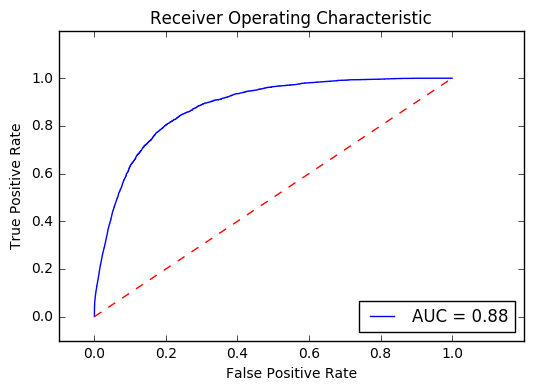

In [20]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

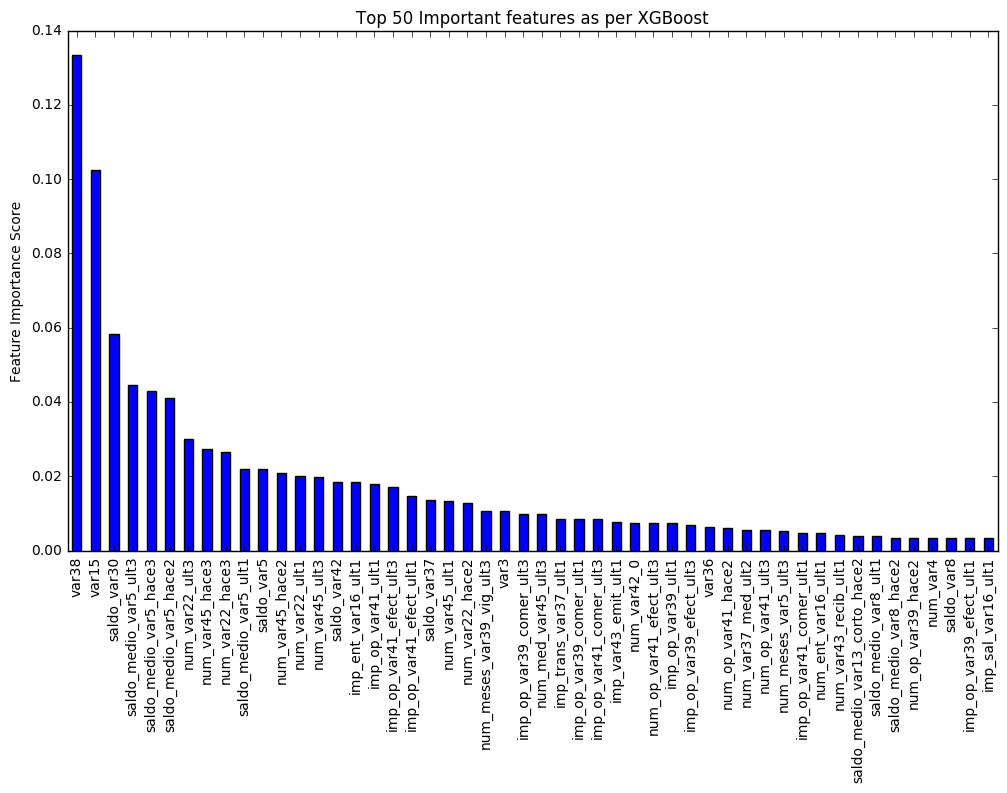

In [21]:
imp_feat_xgb=pd.Series(xgb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_feat_xgb[:50].plot(kind='bar',title='Top 50 Important features as per XGBoost', figsize=(12,8))
plt.ylabel('Feature Importance Score')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatureImportance.png')
plt.show()

In [22]:
# Save indexes of the important features in descending order of their importance
indices = np.argsort(xgb_clf.feature_importances_)[::-1]
select_feat =[str(s) for s in X_train.columns[indices][:50]]
train_x_sub = X_train[select_feat]
test_sub = X_test[select_feat]

In [25]:
y_test.shape

(15204,)

In [118]:
y_train.shape

(45612,)

In [23]:
test_sub.head()

,var38,var15,saldo_var30,saldo_medio_var5_ult3,saldo_medio_var5_hace3,saldo_medio_var5_hace2,num_var22_ult3,num_var45_hace3,num_var22_hace3,saldo_medio_var5_ult1,...,num_ent_var16_ult1,num_var43_recib_ult1,saldo_medio_var13_corto_hace2,saldo_medio_var8_ult1,saldo_medio_var8_hace2,num_op_var39_hace2,num_var4,saldo_var8,imp_op_var39_efect_ult1,imp_sal_var16_ult1
1019,48767.490000,23,3.00,3.00,0.00,3.00,0,0,0,3.0,...,0,0,0.0,0.00,0.00,0,1,0.00,0.0,0.0
9086,117310.979016,25,3.00,2.88,2.61,3.00,0,0,0,3.0,...,0,0,0.0,0.00,0.00,0,1,0.00,0.0,0.0
18757,97660.320000,47,60.00,69.66,34.26,114.69,6,24,0,60.0,...,0,0,0.0,0.00,0.00,3,2,0.00,0.0,0.0
67548,203764.110000,23,0.00,0.00,0.00,0.00,0,0,0,0.0,...,0,0,0.0,0.00,0.00,0,0,0.00,0.0,0.0
30003,187564.770000,23,675.36,0.00,2.61,0.00,21,0,9,0.0,...,0,0,0.0,1247.55,510.51,0,3,675.36,600.0,0.0


In [24]:
# Define a new XGBoost Classifier with default parameters
select_xgb_clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, seed=10)

param_grid = {
    
            'max_depth':[3,4,5],
            'min_child_weight':[3,4,5]
}
grid_clf = GridSearchCV(select_xgb_clf,param_grid,cv=5,scoring='roc_auc' )

# Train the model
grid_clf.fit(train_x_sub,y_train)
grid_clf.grid_scores_, grid_clf.best_params_, grid_clf.best_score_

([mean: 0.83636, std: 0.00574, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.83668, std: 0.00600, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.83615, std: 0.00560, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.83679, std: 0.00639, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: 0.83689, std: 0.00655, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.83720, std: 0.00674, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.83635, std: 0.00593, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.83567, std: 0.00622, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.83638, std: 0.00645, params: {'max_depth': 5, 'min_child_weight': 5}],
 {'max_depth': 4, 'min_child_weight': 5},
 0.8372022513492344)

In [25]:
# Define a new XGBoost Classifier setting the best value for the above parameter and 
# default for the rest
select_xgb_clf = xgb.XGBClassifier(learning_rate=0.1,n_estimators=100, max_depth= 4, 
                                   min_child_weight= 5,seed=10)

# Set a list of parameters
param_grid = {
    
            'subsample':[0.6,0.7,0.8,0.9],
            'colsample_bytree':[0.6,0.7,0.8,0.9]
}
grid_clf = GridSearchCV(select_xgb_clf,param_grid,cv=5, scoring='roc_auc')

# Train the model
grid_clf.fit(train_x_sub,y_train)
grid_clf.grid_scores_, grid_clf.best_params_, grid_clf.best_score_

([mean: 0.83719, std: 0.00648, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.83792, std: 0.00633, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.83713, std: 0.00610, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.83733, std: 0.00618, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.83741, std: 0.00653, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.83755, std: 0.00543, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.83714, std: 0.00595, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.83848, std: 0.00558, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.83712, std: 0.00590, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.83778, std: 0.00670, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.83706, std: 0.00641, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.83797, std: 0.00630, params: {'subsample': 0.9, 'colsample_bytree'

In [26]:
# Define a new XGBoost Classifier with parameters setting so far.
select_xgb_clf = xgb.XGBClassifier(learning_rate=0.1,n_estimators=100, max_depth= 5, min_child_weight= 5,
                                  gamma=0,subsample=0.9, colsample_bytree=0.7, seed=10)

# Set a list of parameters
param_grid = {
    
         'reg_alpha':[0.001, 0.005, 0.01, 0.05]   
}
grid_clf = GridSearchCV(select_xgb_clf,param_grid,cv=5, scoring='roc_auc')

# Train the model
grid_clf.fit(train_x_sub,y_train)
grid_clf.grid_scores_, grid_clf.best_params_, grid_clf.best_score_

([mean: 0.83754, std: 0.00643, params: {'reg_alpha': 0.001},
  mean: 0.83761, std: 0.00624, params: {'reg_alpha': 0.005},
  mean: 0.83757, std: 0.00608, params: {'reg_alpha': 0.01},
  mean: 0.83765, std: 0.00587, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.05},
 0.8376527127788085)

In [27]:
# Define a new XGBoost Classifier.
select_xgb_clf = xgb.XGBClassifier(n_estimators=75, max_depth= 5, min_child_weight= 5,gamma=0,
                                   reg_alpha= 0.05,subsample=0.7, colsample_bytree=0.7, seed=10)

# Set a list of parameters
param_grid = {
    
         'learning_rate':[0.05,0.08, 0.1, 0.15]   
}
grid_clf = GridSearchCV(select_xgb_clf,param_grid,cv=5, scoring='roc_auc')

# Train the model
grid_clf.fit(train_x_sub,y_train)
grid_clf.grid_scores_, grid_clf.best_params_, grid_clf.best_score_

([mean: 0.83573, std: 0.00491, params: {'learning_rate': 0.05},
  mean: 0.83808, std: 0.00528, params: {'learning_rate': 0.08},
  mean: 0.83712, std: 0.00595, params: {'learning_rate': 0.1},
  mean: 0.83556, std: 0.00670, params: {'learning_rate': 0.15}],
 {'learning_rate': 0.08},
 0.8380758891290577)

In [28]:
best_xgb_clf = grid_clf.best_estimator_
grid_clf.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0, learning_rate=0.08, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=75, nthread=-1,
       objective='binary:logistic', reg_alpha=0.05, reg_lambda=1,
       scale_pos_weight=1, seed=10, silent=True, subsample=0.7)

In [29]:
# Make prediction with test data
predicted_proba = best_xgb_clf.predict_proba(test_sub)

In [30]:
predicted_proba[:,1]

array([ 0.0074653 ,  0.0094148 ,  0.04694097, ...,  0.02624334,
        0.03224584,  0.02001919], dtype=float32)

In [31]:
print('Overall AUC:', roc_auc_score(y_test, best_xgb_clf.predict_proba(test_sub, ntree_limit=xgb_clf.best_iteration)[:,1]))


Overall AUC: 0.848667539136


In [32]:
print('Overall AUC:', roc_auc_score(y_test, predicted_proba[:,1]))

Overall AUC: 0.848667539136


In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

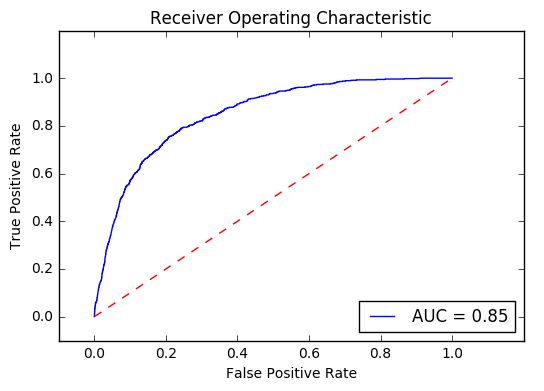

In [43]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
# Make prediction with test data
test_sub1 = test[select_feat]
predicted_proba = best_xgb_clf.predict_proba(test_sub1)

# Save the prediction in CSV file
# predicted_proba has probabilities for each Target class for each observation.
# We are concerned about probability of class 1 and hence taking predicted_proba[:,1]
submission = pd.DataFrame({'ID':test_id,'TARGET':predicted_proba[:,1]})
submission.to_csv('/Users/jyothi/Desktop/submission.csv', index=False)